In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

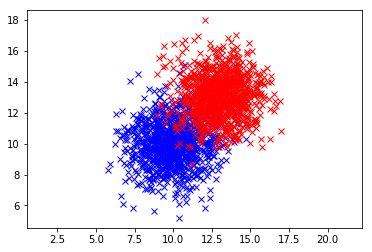

In [52]:
#Unimodale Testdaten
x1, y1 = np.random.multivariate_normal([10, 10], [[2, 0],[0, 2]], 1000).T
plt.plot(x1, y1, 'bx')
x2, y2 = np.random.multivariate_normal([13, 13], [[2, 0],[0, 2]], 1000).T
plt.plot(x2, y2, 'rx')
plt.axis('equal')
plt.show()

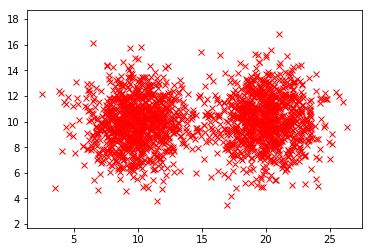

In [3]:
#Multimodale Testdaten
x3, y3 = np.random.multivariate_normal([10, 10], [[4, 0],[0, 4]], 1000).T
x4, y4 = np.random.multivariate_normal([20, 10], [[4, 0],[0, 4]], 1000).T
x5 = np.concatenate((x3,x4))
y5 = np.concatenate((y3,y4))
plt.plot(x5, y5, 'rx')
plt.axis('equal')
plt.show()

In [53]:
#Logistic Regression
Klassen = []
for j in range(0,1400):
    if j < 700:
        Klassen.append(0)
    else:
        Klassen.append(1)

i = 1
X = [[x1[0],y1[0]]]
while i < 700:
    X += [[x1[i], y1[i]]]
    i += 1
i = 0
while i < 700:
    X += [[x2[i],y2[i]]]
    i += 1
X = np.asarray(X)
logreg.fit(X, Klassen)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

([], <a list of 0 Text yticklabel objects>)

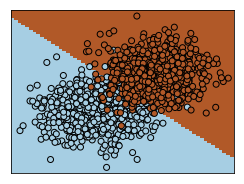

In [57]:
#Darstellung
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Klassen, edgecolors='k', cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

In [64]:
#Fehlerwahrscheinlichkeit
#Klasse 1
i = 1
X_Test = [[x1[0+700],y1[0+700]]]
while i < 300:
    X_Test += [[x1[i+700], y1[i+700]]]
    i += 1
EstimatedClass = logreg.predict(X_Test)

rightDecision = 0
for ec in EstimatedClass:
    if ec == 0:
        rightDecision += 1
#Klasse 2
i = 1
X_Test = [[x1[0+700],y1[0+700]]]
while i < 300:
    X_Test += [[x2[i+700], y2[i+700]]]
    i += 1
EstimatedClass = logreg.predict(X_Test)

for ec in EstimatedClass:
    if ec == 1:
        rightDecision += 1
Fehlerwahrscheinlichkeit = 1 - (rightDecision / 600)
print('Die Fehlerwahrscheinlichkeit beträgt: ' + str(Fehlerwahrscheinlichkeit))

Die Fehlerwahrscheinlichkeit beträgt: 0.06999999999999995
